# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [32]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [33]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

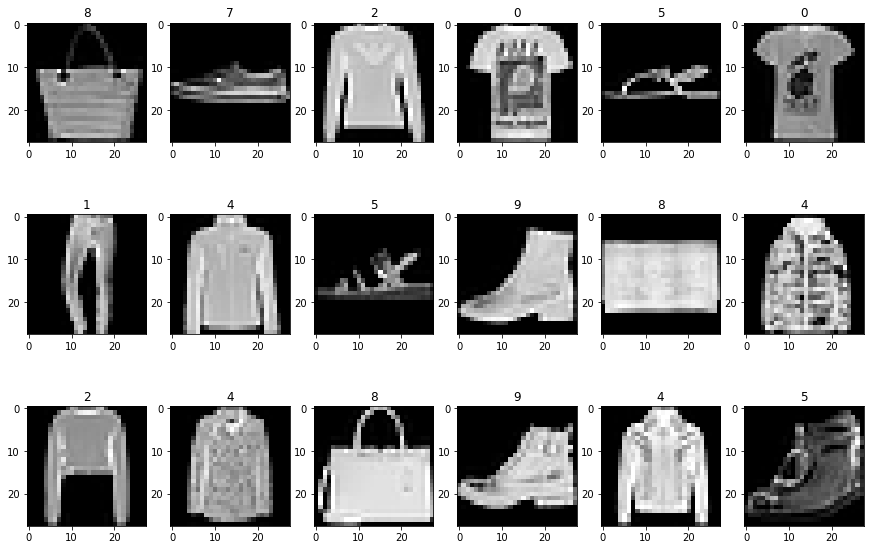

In [34]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [35]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [36]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 flatten_8 (Flatten)         (None, 25088)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               3211392   
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [37]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 5s 5ms/step - loss: 0.3940 - accuracy: 0.8624 - val_loss: 0.3272 - val_accuracy: 0.8817
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2705 - accuracy: 0.9037 - val_loss: 0.2939 - val_accuracy: 0.8925
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2324 - accuracy: 0.9158 - val_loss: 0.3009 - val_accuracy: 0.8939
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2025 - accuracy: 0.9252 - val_loss: 0.3033 - val_accuracy: 0.8962
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1796 - accuracy: 0.9343 - val_loss: 0.3118 - val_accuracy: 0.8970
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1613 - accuracy: 0.9405 - val_loss: 0.3095 - val_accuracy: 0.9002
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1437 - accuracy: 0.9468 - val_loss: 0.3362 - val_accuracy: 0.8946
Epoch 

Train Acc      0.995199978351593
Validation Acc 0.8892999887466431


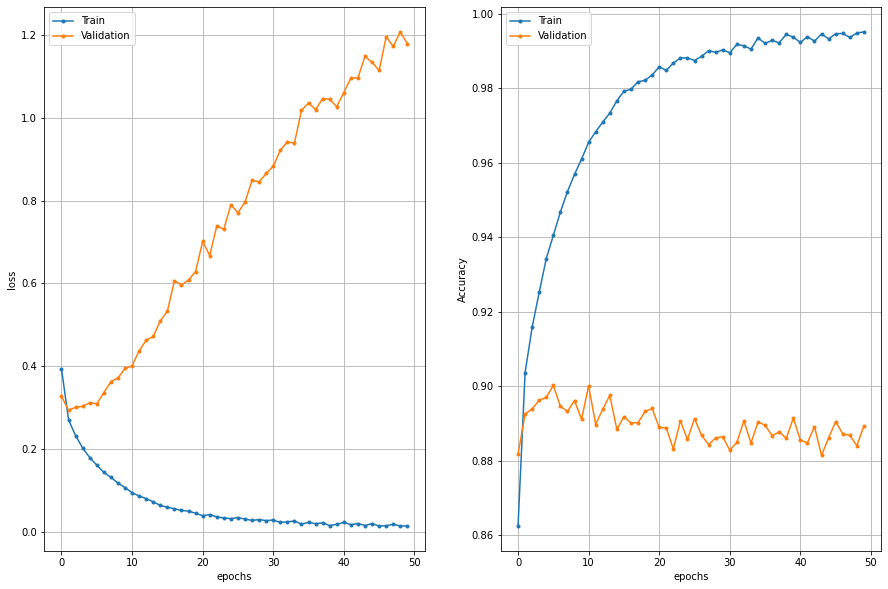

In [38]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [45]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Flatten()(net)
net = Dense(64)(net)
net = Dropout(0.5)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 flatten_10 (Flatten)        (None, 12544)             0         
                                                                 
 dense_20 (Dense)            (None, 64)                802880    
                                                          

In [46]:
# Train the network
from tensorflow.keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

from sklearn.utils import shuffle

def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x[idx:idx + batch_size, ...]
            y_ = y[idx:idx + batch_size]
            
            if len(y_) < batch_size:
                x, y = shuffle(x, y)
                break
            
            # Augmentation
            for idx_aug in range(batch_size):
                if np.random.rand() > 0.5:
                    x_[idx_aug, ...] = np.fliplr(x_[idx_aug, ...])                                    
                    
            yield x_, y_

epochs = 50
batch_size = 64
steps_per_epoch = len(y_train) // batch_size
generator = datagen(x_train, y_train, batch_size)
print(x_train.shape)

start = time()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test), callbacks=[custom_early_stopping])
print('Elapsed time', time() - start)

(60000, 28, 28)
Epoch 1/50
937/937 [==============================] - 6s 6ms/step - loss: 0.4962 - accuracy: 0.8294 - val_loss: 0.3734 - val_accuracy: 0.8700
Epoch 2/50
937/937 [==============================] - 6s 6ms/step - loss: 0.3633 - accuracy: 0.8747 - val_loss: 0.3304 - val_accuracy: 0.8815
Epoch 3/50
937/937 [==============================] - 5s 5ms/step - loss: 0.3304 - accuracy: 0.8860 - val_loss: 0.3134 - val_accuracy: 0.8847
Epoch 4/50
937/937 [==============================] - 5s 6ms/step - loss: 0.3077 - accuracy: 0.8932 - val_loss: 0.2862 - val_accuracy: 0.8982
Epoch 5/50
937/937 [==============================] - 5s 6ms/step - loss: 0.2944 - accuracy: 0.8971 - val_loss: 0.2940 - val_accuracy: 0.8918
Epoch 6/50
937/937 [==============================] - 5s 6ms/step - loss: 0.2811 - accuracy: 0.9007 - val_loss: 0.2811 - val_accuracy: 0.9005
Epoch 7/50
937/937 [==============================] - 5s 5ms/step - loss: 0.2747 - accuracy: 0.9027 - val_loss: 0.2796 - val_accurac

Train Acc      0.9237593412399292
Validation Acc 0.9106000065803528


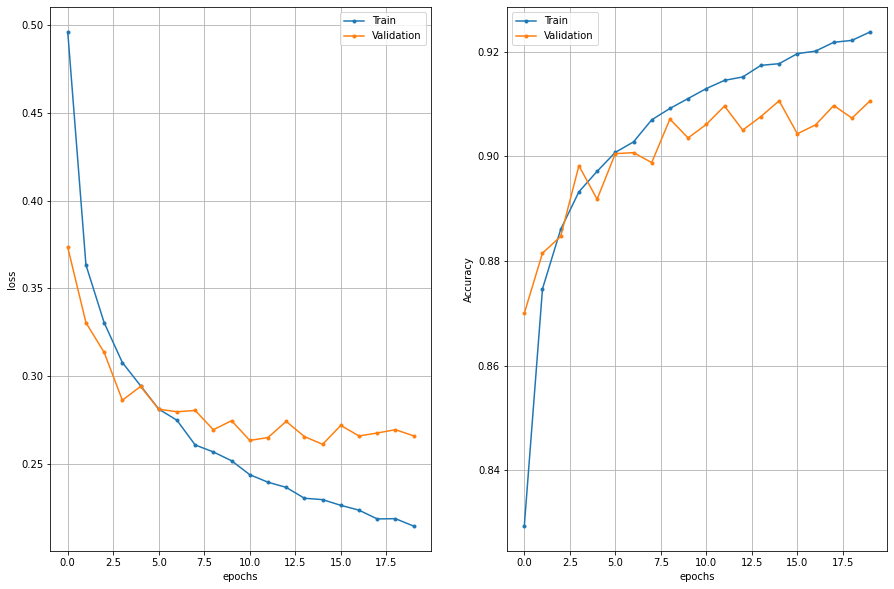

In [47]:
# Show the results

plot_history(history)

### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?
<br>

#### **Work logs**

<code>+ Dropout: Validation Acc 0.8950999975204468</code><br>
<code>+ Random flip: Validation Acc 0.8989999890327454</code><br>
<code>+ Rotate 90: Validation Acc 0.8737000226974487</code> - not help at all(<br>
<code>- Rotate</code><br>
<code>+ MaxPooling2D: Validation Acc 0.8902999758720398</code> - graphics looks much better, but accuracy is still less 0.91<br>
<code>+ three layers (Conv2D 64, MaxPooling2D, Dropout 0.2): 0.8902000188827515</code> - not enough<br>
<code>+ Dropout 0.5 before final Dense layer, change count of neurons, callback for early stoping of fitting - and finally validation accuracy 0.9106000065803528<br>

#### **Conclusions**
The complications of the model helped to reach your accuracy aim. But to be honest, I'm not sure that there is only one option to get more than 0.91 accuracies. I believe more complex data augmentation should also help. Unfortunately, I can not try all cases due to lack of time and electricity(
